# Assignment 5


You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 3):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data"

The folder contains the yearly data files from 1996 to 2017 school years.

Your Jupyter Notebook file should not be in the CollegeScorecard_Raw_Data folder.

I suggest you create a new folder call "Assignment4" and place the Notebook file and the data folder under it.

Assignment4/

- Jay.ipynb
- CollegeScorecard_Raw_Data/
    - ...
    - 'MERGED1996_97_PP.csv',
    - 'MERGED2015_16_PP.csv',
    - ...
    - 'MERGED2017_18_PP.csv'

In [74]:
# <1> 
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [75]:
# <2>
# Find out what files are in the folder and assign the list of files to a variable for later processing
# you would need to import a library call os which stands for operating system. so place that import statement in previous cell.
# # os library also has method getcwd() to get the current working directory. since your notebook and your data files are not in 
# the same folder, you want to make sure what is the current working folder and how to access a data file in a different folder
# display the current workin directory
datadir=os.getcwd()
datadir

'C:\\Users\\Prashant Mourya'

In [76]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder
# use this method to assign the contents of the data folder to a variable and display it
data_dir = "C:/Users/Prashant Mourya/Downloads/CollegeScorecard_Raw_Data"
csv_files = os.listdir(data_dir)
csv_files

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [77]:
# <4> 
# The folder contains a couple of files that are not the yearly data files
# write code to remove the unwanted files from the list (Note: not from the folder in your drive)
# hint: use pop or remove functions of a list. pop and remove work differently though.

csv_files.pop(0)
csv_files.pop(0)
csv_files.pop(0)
csv_files.pop(0)
csv_files.pop(0)
csv_files

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [78]:
column_list = ["UNITID", "INSTNM","ADM_RATE","TUITIONFEE_IN"]

df_list = []
for csv_file in csv_files:
    df = pd.read_csv(data_dir + '/'+ csv_file, usecols=column_list)
    df["YEAR"] = csv_file[6:10]
    df_list.append(df)

df = pd.concat(df_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6805
Data columns (total 5 columns):
UNITID           163331 non-null int64
INSTNM           163331 non-null object
ADM_RATE         44911 non-null float64
TUITIONFEE_IN    79194 non-null float64
YEAR             163331 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ MB


In [79]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
df.shape



(163331, 5)

In [30]:
df.head()


,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,NaN,NaN,1996
1,100654,Alabama A & M University,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,NaN,NaN,1996
4,100690,Amridge University,NaN,NaN,1996


In [31]:
df.tail()

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,Georgia Military College - Dublin,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,NaN,NaN,2018
6804,49005401,Health Career Institute- Lauderdale Lakes,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,NaN,NaN,2018


In [33]:
df.isnull().sum()

UNITID                0
INSTNM                0
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

In [34]:
df.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,44911.000000,79194.000000
mean,9.432395e+05,0.692946,11665.505367
std,4.571721e+06,0.217062,9985.998016
min,1.006360e+05,0.000000,0.000000
25%,1.633380e+05,0.555000,3776.000000
50%,2.127800e+05,0.717500,9285.000000
75%,4.075680e+05,0.857100,16146.000000
max,4.914640e+07,1.000000,74787.000000


In [43]:
# <7>
# the dataframe contains 22 years of data of all U.S. colleges.
# let's just look at UMBC
# filte/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
umbc_df=df[df.INSTNM.eq('University of Maryland-Baltimore County')]

In [45]:

# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
umbc_df.head()


,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,NaN,5490.0,2000


In [46]:
umbc_df.tail()

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
1610,163268,University of Maryland-Baltimore County,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,0.5794,11778.0,2018


In [47]:
umbc_df.sample()

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
1478,163268,University of Maryland-Baltimore County,0.6021,11518.0,2017


In [48]:
umbc_df.isnull().sum()

UNITID           0
INSTNM           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [49]:
umbc_df.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN
count,23.0,18.000000,19.000000
mean,163268.0,0.640694,9004.842105
std,0.0,0.052728,1825.795421
min,163268.0,0.568300,5490.000000
25%,163268.0,0.597600,8270.000000
50%,163268.0,0.632100,8872.000000
75%,163268.0,0.689375,10226.000000
max,163268.0,0.717400,11778.000000


Text(0, 0.5, 'Tuition')

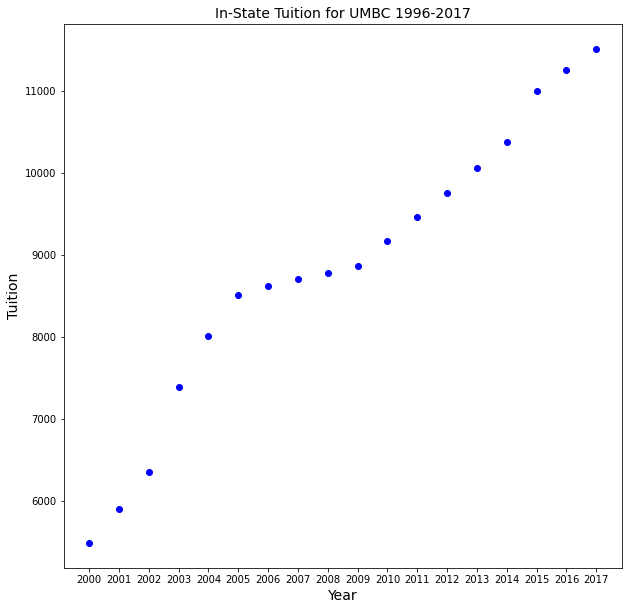

In [56]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2017.
umbc=umbc_df[umbc_df.YEAR <='2017']
fig, ax = plt.subplots(figsize= (10,10))  
ax.scatter(umbc['YEAR'], umbc['TUITIONFEE_IN'], color='blue')
ax.set_title('In-State Tuition for UMBC 1996-2017', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Tuition', fontsize=14)


In [89]:
# <10>
# go back to 5/6/7 and modify the code to look at Johns Hopskins University instead.
# (No code to write here, you just modify the previous cells)

JHU_df=df[df.INSTNM.eq('Johns Hopkins University')]

In [90]:
JHU_df

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,NaN,NaN,1996
2039,162928,Johns Hopkins University,NaN,NaN,1997
1973,162928,Johns Hopkins University,NaN,NaN,1998
1946,162928,Johns Hopkins University,NaN,NaN,1999
1917,162928,Johns Hopkins University,NaN,24930.0,2000
1906,162928,Johns Hopkins University,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,0.3509,31620.0,2005


In [83]:
JHU_df.head()

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,NaN,NaN,1996
2039,162928,Johns Hopkins University,NaN,NaN,1997
1973,162928,Johns Hopkins University,NaN,NaN,1998
1946,162928,Johns Hopkins University,NaN,NaN,1999
1917,162928,Johns Hopkins University,NaN,24930.0,2000


In [ ]:
JHU_df.tail()

In [91]:
JHU_df.sample()

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
1973,162928,Johns Hopkins University,NaN,NaN,1998


In [84]:
JHU_df.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN
count,23.0,18.000000,19.000000
mean,162928.0,0.232544,38925.263158
std,0.0,0.081533,9210.110609
min,162928.0,0.114800,24930.000000
25%,162928.0,0.165925,30880.000000
50%,162928.0,0.239800,39150.000000
75%,162928.0,0.299300,46265.000000
max,162928.0,0.350900,53740.000000


In [ ]:
JHU_df.info()

In [97]:
# <11> 
# Now, we like to compare UMBC and JHU
# filte/query the dataframe to retrieve only rows that belong to UMBC orJHU
# save the UMNC/JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
new_df = df[df.INSTNM.eq('Johns Hopkins University')| df.INSTNM.eq('University of Maryland-Baltimore County')]


In [62]:
# <12>
# Explore the new dataframe (#of observations, varibles, head, tail, sample, missing values, statistics,etc.)
new_df.head(5)

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,NaN,NaN,1996
2151,163268,University of Maryland-Baltimore County,NaN,NaN,1996
2039,162928,Johns Hopkins University,NaN,NaN,1997
2049,163268,University of Maryland-Baltimore County,NaN,NaN,1997
1973,162928,Johns Hopkins University,NaN,NaN,1998


In [63]:
new_df.tail(5)

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
1510,163268,University of Maryland-Baltimore County,0.5683,11264.0,2016
1473,162928,Johns Hopkins University,0.1254,52170.0,2017
1478,163268,University of Maryland-Baltimore County,0.6021,11518.0,2017
1410,162928,Johns Hopkins University,0.1148,53740.0,2018
1415,163268,University of Maryland-Baltimore County,0.5794,11778.0,2018


In [98]:

new_df.describe()


,UNITID,ADM_RATE,TUITIONFEE_IN
count,46.00000,36.000000,38.000000
mean,163098.00000,0.436619,23965.052632
std,171.87851,0.217752,16515.000680
min,162928.00000,0.114800,5490.000000
25%,162928.00000,0.248450,8946.750000
50%,163098.00000,0.459600,18354.000000
75%,163268.00000,0.631800,38787.500000
max,163268.00000,0.717400,53740.000000


In [99]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 2139 to 1415
Data columns (total 5 columns):
UNITID           46 non-null int64
INSTNM           46 non-null object
ADM_RATE         36 non-null float64
TUITIONFEE_IN    38 non-null float64
YEAR             46 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ KB


In [64]:
new_df.sample(5)

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
1906,162928,Johns Hopkins University,0.3431,26210.0,2001
1873,163268,University of Maryland-Baltimore County,0.5757,7388.0,2003
1555,163268,University of Maryland-Baltimore County,0.5942,11006.0,2015
1779,163268,University of Maryland-Baltimore County,0.6895,8708.0,2007
1478,163268,University of Maryland-Baltimore County,0.6021,11518.0,2017


In [65]:
new_df.isna().sum()

UNITID            0
INSTNM            0
ADM_RATE         10
TUITIONFEE_IN     8
YEAR              0
dtype: int64

Text(0, 0.5, 'Tuition')

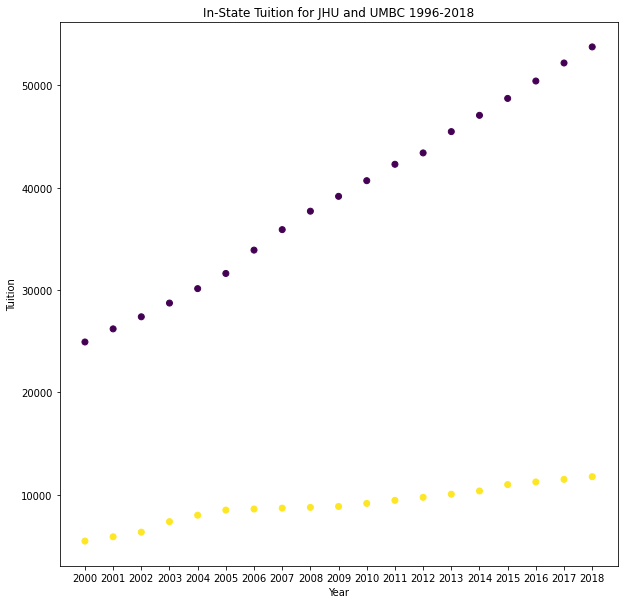

In [73]:
fig, ax = plt.subplots(figsize=(10,10))  
ax.scatter(new_df['YEAR'], new_df['TUITIONFEE_IN'], c=new_df['UNITID'])
ax.set_title('In-State Tuition for JHU and UMBC 1996-2018')
ax.set_xlabel('Year')
ax.set_ylabel('Tuition')


In [ ]:
# <14> 
# document your observation/conclusion of the plot (use the following Markdown cell)

Based on my observation of the plot,
UMBC appears to have a lower average tuition fee compared to JHU.
UMBC's tuition fee has a very less significant increase over the years whereas JHU has a very significant increase in tuition fees ovefr the years

In [100]:
# The end.